In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
dataset_name = "malaria"

In [2]:
(ds_train, ds_val, ds_test), ds_info = tfds.load(
    dataset_name,
    split = ['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info = True,
    as_supervised = True,

)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/27558 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/malaria/1.0.0.incompleteFISZ5Q/malaria-train.tfrecord*...:   0%|          …

Dataset malaria downloaded and prepared to /root/tensorflow_datasets/malaria/1.0.0. Subsequent calls will reuse this data.


In [3]:
print(ds_info)

tfds.core.DatasetInfo(
    name='malaria',
    full_name='malaria/1.0.0',
    description="""
    The Malaria dataset contains a total of 27,558 cell images with equal instances
    of parasitized and uninfected cells from the thin blood smear slide images of
    segmented cells.
    """,
    homepage='https://lhncbc.nlm.nih.gov/publication/pub9932',
    data_dir=PosixGPath('/tmp/tmpsgjcoulmtfds'),
    file_format=tfrecord,
    download_size=337.08 MiB,
    dataset_size=317.62 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=27558, num_shards=4>,
    },
    citation="""@article{rajaraman2018pre,
      title={Pre-trained convolutional neural networks as feature extractors toward
      improved malaria parasite detection in thin blood smear images},


In [4]:
def basic_preprocess(image, label):
    image = tf.image.resize(image, [150,150])
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

In [5]:
def augment(image, label):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    image = tf.image.random_brightness(image, 0.1)
    image = tf.image.random_contrast(image, 0.9, 1.1)
    return image, label


In [6]:
ds_train = ds_train.map(augment, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_train = ds_train.map(basic_preprocess, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_val = ds_val.map(basic_preprocess, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_test = ds_test.map(basic_preprocess, num_parallel_calls=tf.data.experimental.AUTOTUNE)

In [7]:
batch_size = 32

ds_train = ds_train.shuffle(1024).batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)
ds_val = ds_val.batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)
ds_test = ds_test.batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)

In [8]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))


In [9]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [11]:
model.fit(ds_train, epochs=11)

Epoch 1/11


/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


689/689 [==============================] - 67s 79ms/step - loss: 0.0000e+00 - accuracy: 0.4988
Epoch 2/11
689/689 [==============================] - 38s 52ms/step - loss: 0.0000e+00 - accuracy: 0.4989
Epoch 3/11
689/689 [==============================] - 31s 44ms/step - loss: 0.0000e+00 - accuracy: 0.4989
Epoch 4/11
689/689 [==============================] - 31s 43ms/step - loss: 0.0000e+00 - accuracy: 0.4989
Epoch 5/11
689/689 [==============================] - 31s 43ms/step - loss: 0.0000e+00 - accuracy: 0.4989
Epoch 6/11
689/689 [==============================] - 30s 43ms/step - loss: 0.0000e+00 - accuracy: 0.4989
Epoch 7/11
689/689 [==============================] - 32s 45ms/step - loss: 0.0000e+00 - accuracy: 0.4989
Epoch 8/11
689/689 [==============================] - 32s 45ms/step - loss: 0.0000e+00 - accuracy: 0.4989
Epoch 9/11
689/689 [==============================] - 30s 43ms/step - loss: 0.0000e+00 - accuracy: 0.4989
Epoch 10/11
689/689 [==============================] - 32

In [12]:
import matplotlib.pyplot as plt
import numpy as np

In [13]:
# Importing Evaluation matrces
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [14]:
y_test = []
y_pred = []

for image, label in ds_test:
    y_test.extend(label.numpy())
    predictions = model.predict(image)
    y_pred.extend(np.argmax(predictions, axis=1))

1/1 [==============================] - 0s 297ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

Accuracy :  0.4974600870827286
--------------------------------------------------
F1 :  [0.66440514 0.        ]
--------------------------------------------------
Reacll :  [1. 0.]
--------------------------------------------------
Precision :  [0.49746009 0.        ]
--------------------------------------------------
Confusion Matrix....
 [[1371    0]
 [1385    0]]
--------------------------------------------------
Classification Report....
               precision    recall  f1-score   support

           0       0.50      1.00      0.66      1371
           1       0.00      0.00      0.00      1385

    accuracy                           0.50      2756
   macro avg       0.25      0.50      0.33      2756
weighted avg       0.25      0.50      0.33      2756

--------------------------------------------------
Plotting Confusion Matrix...



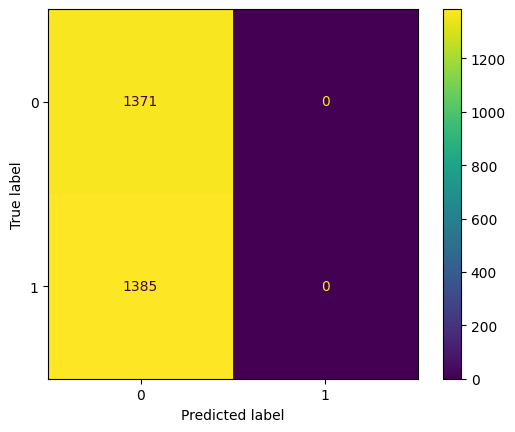

In [15]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Precision
precision = precision_score(y_test, y_pred, average=None)

# Recall
recall = recall_score(y_test, y_pred, average=None)

# F1 Score
f1_sco = f1_score(y_test, y_pred, average=None)

# Confusion Matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Report
report = classification_report(y_test, y_pred)

print('Accuracy : ', accuracy)
print("-"*50)
print('F1 : ', f1_sco)
print("-"*50)
print('Reacll : ', recall)
print("-"*50)
print('Precision : ', precision)
print("-"*50)
print('Confusion Matrix....\n', confusion_mat)
print("-"*50)
print('Classification Report....\n', report)
print("-"*50)
print('Plotting Confusion Matrix...\n')
disp = ConfusionMatrixDisplay(confusion_mat, display_labels=None)
disp.plot()
plt.show()